In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler




In [7]:
data = pd.read_csv('src\\Dataset\\Liver Patient Dataset (LPD)_train.csv',encoding= 'unicode_escape')

In [8]:
data.columns = data.columns.str.strip()

In [9]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [10]:
nafld_columns = ['Age of the patient', 'Total Bilirubin', 'ALB Albumin', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase']
lft_columns = ['Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']
albi_columns = ['Total Bilirubin', 'ALB Albumin']

In [11]:

def determine_optimal_clusters(data_scaled, method_name):
    inertia = []
    silhouette_avg_kmeans = []
    silhouette_avg_spectral = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_avg_kmeans.append(silhouette_score(data_scaled, kmeans.labels_))
        
        spectral = SpectralClustering(n_clusters=k, random_state=42)
        spectral_labels = spectral.fit_predict(data_scaled)
        silhouette_avg_spectral.append(silhouette_score(data_scaled, spectral_labels))
    
    # Plot Elbow and Silhouette for KMeans
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), inertia, marker='o')
    plt.title(f'Elbow Method for {method_name} (KMeans)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_avg_kmeans, marker='o', label='KMeans')
    plt.plot(range(2, 11), silhouette_avg_spectral, marker='x', label='Spectral Clustering')
    plt.title(f'Silhouette Score for {method_name}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.show()
    
    optimal_kmeans_clusters = silhouette_avg_kmeans.index(max(silhouette_avg_kmeans)) + 2
    optimal_spectral_clusters = silhouette_avg_spectral.index(max(silhouette_avg_spectral)) + 2
    
    print(f'Optimal number of clusters for {method_name} (KMeans) is {optimal_kmeans_clusters}')
    print(f'Optimal number of clusters for {method_name} (Spectral Clustering) is {optimal_spectral_clusters}')
    
    return optimal_kmeans_clusters, optimal_spectral_clusters



In [1]:
# pip install kneed

C:\Users\ssudh\AppData\Local\Temp\ipykernel_9816\2726061828.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dbscan.fillna(data_dbscan.mean(), inplace=True)


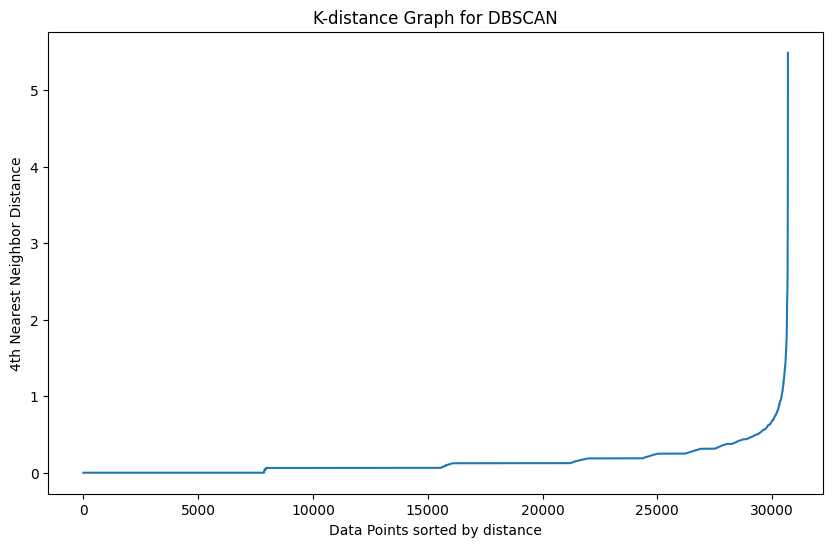

Optimal eps value determined by Kneedle algorithm: 1.794434416668733


In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from kneed import KneeLocator


dbscan_columns = [
    'Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 
    'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 
    'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 
    'A/G Ratio Albumin and Globulin Ratio'
]

data_dbscan = data[dbscan_columns]

data_dbscan.fillna(data_dbscan.mean(), inplace=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_dbscan)

k = 4  
nbrs = NearestNeighbors(n_neighbors=k).fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve="convex", direction="increasing")
optimal_eps = distances[kneedle.knee]
print(f"Optimal eps value determined by Kneedle algorithm: {optimal_eps}")

from sklearn.cluster import DBSCAN

min_samples_dbscan = len(dbscan_columns) + 1

In [12]:
def perform_clustering(data, method_name):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    optimal_kmeans_clusters, optimal_spectral_clusters = determine_optimal_clusters(data_scaled, method_name)
    
    kmeans = KMeans(n_clusters=optimal_kmeans_clusters, random_state=42)
    kmeans_clusters = kmeans.fit_predict(data_scaled)
    
    spectral = SpectralClustering(n_clusters=optimal_spectral_clusters, random_state=42)
    spectral_clusters = spectral.fit_predict(data_scaled)
    
    dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples_dbscan)
    dbscan_clusters = dbscan.fit_predict(data_scaled)
    
    return kmeans_clusters, spectral_clusters, dbscan_clusters



In [ ]:
nafld_kmeans_clusters, nafld_spectral_clusters, nafld_dbscan_clusters = perform_clustering(data[nafld_columns], 'NAFLD')



In [ ]:
lft_kmeans_clusters, lft_spectral_clusters, lft_dbscan_clusters = perform_clustering(data[lft_columns], 'LFT')

In [ ]:
albi_kmeans_clusters, albi_spectral_clusters, albi_dbscan_clusters = perform_clustering(data[albi_columns], 'ALBI')

In [ ]:
data['NAFLD_KMeans_Cluster'] = nafld_kmeans_clusters
data['NAFLD_Spectral_Cluster'] = nafld_spectral_clusters
data['NAFLD_DBSCAN_Cluster'] = nafld_dbscan_clusters
data['LFT_KMeans_Cluster'] = lft_kmeans_clusters
data['LFT_Spectral_Cluster'] = lft_spectral_clusters
data['LFT_DBSCAN_Cluster'] = lft_dbscan_clusters
data['ALBI_KMeans_Cluster'] = albi_kmeans_clusters
data['ALBI_Spectral_Cluster'] = albi_spectral_clusters
data['ALBI_DBSCAN_Cluster'] = albi_dbscan_clusters



In [ ]:
X_nafld = data[nafld_columns + ['NAFLD_KMeans_Cluster', 'NAFLD_Spectral_Cluster', 'NAFLD_DBSCAN_Cluster']]
X_lft = data[lft_columns + ['LFT_KMeans_Cluster', 'LFT_Spectral_Cluster', 'LFT_DBSCAN_Cluster']]
X_albi = data[albi_columns + ['ALBI_KMeans_Cluster', 'ALBI_Spectral_Cluster', 'ALBI_DBSCAN_Cluster']]
y = data['Result']



In [ ]:
X_train_nafld, X_test_nafld, y_train, y_test = train_test_split(X_nafld, y, test_size=0.3, random_state=42)
X_train_lft, X_test_lft, _, _ = train_test_split(X_lft, y, test_size=0.3, random_state=42)
X_train_albi, X_test_albi, _, _ = train_test_split(X_albi, y, test_size=0.3, random_state=42)



In [ ]:
scaler = StandardScaler()
X_train_nafld = scaler.fit_transform(X_train_nafld)
X_test_nafld = scaler.transform(X_test_nafld)
X_train_lft = scaler.fit_transform(X_train_lft)
X_test_lft = scaler.transform(X_test_lft)
X_train_albi = scaler.fit_transform(X_train_albi)
X_test_albi = scaler.transform(X_test_albi)



In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': LinearSVC(random_state=42, max_iter=10000),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}



In [ ]:
def evaluate_models(X_train, X_test, y_train, y_test, method_name):
    accuracy_scores = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[model_name] = accuracy
        print(f'{model_name} Accuracy for {method_name}: {accuracy}')
        print(classification_report(y_test, y_pred))
    return accuracy_scores



In [ ]:
print("NAFLD Method")
nafld_accuracy = evaluate_models(X_train_nafld, X_test_nafld, y_train, y_test, 'NAFLD')

print("\nLFT Method")
lft_accuracy = evaluate_models(X_train_lft, X_test_lft, y_train, y_test, 'LFT')

print("\nALBI Method")
albi_accuracy = evaluate_models(X_train_albi, X_test_albi, y_train, y_test, 'ALBI')



In [ ]:
def compare_accuracies(nafld_accuracy, lft_accuracy, albi_accuracy):
    print("\nOverall Accuracy Comparison:")
    for model_name in models.keys():
        print(f"{model_name}:")
        print(f"  NAFLD Accuracy: {nafld_accuracy[model_name]}")
        print(f"  LFT Accuracy: {lft_accuracy[model_name]}")
        print(f"  ALBI Accuracy: {albi_accuracy[model_name]}")
        print()



In [ ]:
compare_accuracies(nafld_accuracy, lft_accuracy, albi_accuracy)